In [1]:
import gym
import os

from datetime import datetime
from tensorforce import Environment, Agent, Runner
from tensorforce_pacman_env import tf_pacman_env

import ale_py.roms as roms
import tensorflow as tf
import tf_agents as tf_a
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters
EPISODE_NUMBER = 500
EPISODE_EVAL_NUMBER = 5
EPISODE_MAX_TIME_STEPS = 300
EVAL_EPISODE_NUMBER = 5
BATCH_SIZE = 64
DISCOUNT = 0.999

In [3]:
# Counts # of trace files in folder
_, _, files = next(os.walk("./pacman_traces"))
trace_count = len(files)

environment = Environment.create(environment=tf_pacman_env)
if(EPISODE_MAX_TIME_STEPS):
    environment.set_max_episode_timesteps(EPISODE_MAX_TIME_STEPS)

eval_environment = Environment.create(environment=tf_pacman_env)

environment.reset()
agent = Agent.create(agent='ddqn', 
    environment=environment, 
    batch_size = BATCH_SIZE, 
    memory = 10000,
    learning_rate=dict(
        type='exponential', unit='episodes', num_steps=1000,
        initial_value=0.01, decay_rate=0.5
    ),
    network = [
        dict(type = 'conv2d', size = 32, window = (8,8), stride = 4, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (4,4), stride = 2, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (3,3), stride = 1, bias = True, activation = "relu"),
        dict(type = 'flatten'),
        dict(type = 'dense',  size = 512, bias = True, activation = 'relu')
    ],
    exploration=1e-4,
    config=dict(device='GPU')
    ) 
print("Agent Created")
agent.pretrain(directory='pacman_traces', num_iterations=30, num_traces=trace_count, num_updates=1)
print("Agent pretrained")
environment.reset()

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


Agent Created
Agent pretrained


array([[[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 88,  88,  67, ...,  67,  88,  88],
        [146, 146,  43, ...,  43, 146, 146],
        [146, 146,  43, ...,  43, 146, 146],
        ..

In [4]:
def evaluate_agent(agent, environment, num_episodes):
    sum_rewards = 0.0
    for _ in range(num_episodes):
        obs = environment.reset()
        internals = agent.initial_internals()
        terminal = False
        while not terminal:
            actions, internals = agent.act(states=obs, internals=internals, independent=True, deterministic=True)
            obs, terminal, reward = environment.execute(actions)
            sum_rewards += reward
    return sum_rewards/num_episodes

In [6]:
# env_name = 'ALE/MsPacman-v5'

# env = gym.make(env_name)
# env = gym.wrappers.AtariPreprocessing(
#     env,
#     noop_max = 30, 
#     frame_skip = 1, 
#     screen_size = 84, 
#     terminal_on_life_loss = False,
#     grayscale_obs = True, 
#     grayscale_newaxis = False, 
#     scale_obs = False)
# env = gym.wrappers.FrameStack(env, num_stack = 4)

# Required by tensorforc for some reason
environment._expect_receive = None
environment._actions = None
#

episode_rew_list = []

eval_list = []

for i in range(EPISODE_NUMBER):
    sum_rewards = 0.0
    num_updates = 0
    observation = environment.reset()
    terminal = False
    while not terminal:
        actions = agent.act(states=observation)
        observation, terminal, reward = environment.execute(actions)
        agent.observe(terminal = terminal, reward = reward)
        sum_rewards += reward
    episode_rew_list.append(sum_rewards)

    if(i % EPISODE_EVAL_NUMBER == 0):
        eval_list.append(evaluate_agent(agent, eval_environment, 5))
        print("Evaluation #", (i/EPISODE_EVAL_NUMBER) + 1, "/", EPISODE_NUMBER/EPISODE_EVAL_NUMBER)

Evaluation # 1.0 / 100.0
Evaluation # 2.0 / 100.0
Evaluation # 3.0 / 100.0
Evaluation # 4.0 / 100.0
Evaluation # 5.0 / 100.0
Evaluation # 6.0 / 100.0
Evaluation # 7.0 / 100.0
Evaluation # 8.0 / 100.0
Evaluation # 9.0 / 100.0
Evaluation # 10.0 / 100.0
Evaluation # 11.0 / 100.0
Evaluation # 12.0 / 100.0
Evaluation # 13.0 / 100.0
Evaluation # 14.0 / 100.0
Evaluation # 15.0 / 100.0
Evaluation # 16.0 / 100.0
Evaluation # 17.0 / 100.0
Evaluation # 18.0 / 100.0
Evaluation # 19.0 / 100.0
Evaluation # 20.0 / 100.0
Evaluation # 21.0 / 100.0
Evaluation # 22.0 / 100.0
Evaluation # 23.0 / 100.0
Evaluation # 24.0 / 100.0
Evaluation # 25.0 / 100.0
Evaluation # 26.0 / 100.0
Evaluation # 27.0 / 100.0
Evaluation # 28.0 / 100.0
Evaluation # 29.0 / 100.0
Evaluation # 30.0 / 100.0
Evaluation # 31.0 / 100.0
Evaluation # 32.0 / 100.0
Evaluation # 33.0 / 100.0
Evaluation # 34.0 / 100.0
Evaluation # 35.0 / 100.0
Evaluation # 36.0 / 100.0
Evaluation # 37.0 / 100.0
Evaluation # 38.0 / 100.0
Evaluation # 39.0 / 1

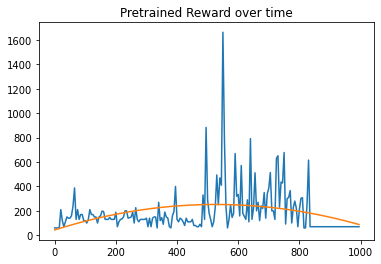

In [ ]:
plt.plot(list(range(0, EPISODE_NUMBER, EPISODE_EVAL_NUMBER)), eval_list)

z = np.polyfit(list(range(0, EPISODE_NUMBER, EPISODE_EVAL_NUMBER)), eval_list, 2)
p = np.poly1d(z)
plt.plot(list(range(0, EPISODE_NUMBER, EPISODE_EVAL_NUMBER)), p(list(range(0, EPISODE_NUMBER, EPISODE_EVAL_NUMBER))))

plt.xlabel = "Episode"
plt.ylabel = "Average Evaluation Reward"
plt.title("Pretrained Reward over time")
plt.show()

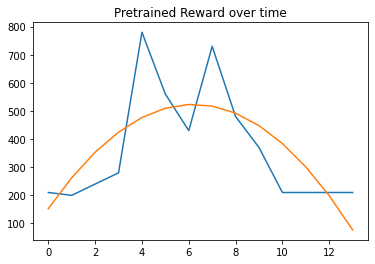

In [4]:
run_reward_list = environment.episode_reward_list

plt.plot(list(range(len(run_reward_list))), run_reward_list)

z = np.polyfit(list(range(len(run_reward_list))), run_reward_list, 2)
p = np.poly1d(z)
plt.plot(list(range(len(run_reward_list))), p(range(len(run_reward_list))))

plt.xlabel = "Episode"
plt.ylabel = "Reward"
plt.title("Pretrained Reward over time")
plt.show()

In [6]:
environment.reset()

environment._expect_receive = None
environment._actions = None

new_agent = Agent.create(agent='ddqn', 
    environment=environment, 
    batch_size = BATCH_SIZE, 
    memory = 10000,
    learning_rate=dict(
        type='exponential', unit='episodes', num_steps=1000,
        initial_value=0.01, decay_rate=0.5
    ),
    network = [
        dict(type = 'conv2d', size = 32, window = (8,8), stride = 4, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (4,4), stride = 2, bias = True, activation = "relu"),
        dict(type = 'conv2d', size = 64, window = (3,3), stride = 1, bias = True, activation = "relu"),
        dict(type = 'pooling', reduction = 'max'),
        dict(type = 'dense',  size = 512, bias = True, activation = 'relu')
    ],
    exploration=1e-3,
    config=dict(device='GPU')
    ) 

new_runner = Runner(agent=new_agent, environment=environment)
new_runner.run(num_episodes=250, mean_horizon=5)

new_runner.run(num_episodes=5, evaluation=True)

Episodes:   0%|          | 0/250 [00:00, return=0.00, ts/ep=0, sec/ep=0.00, ms/ts=0.0, agent=0.0%]

KeyboardInterrupt: 

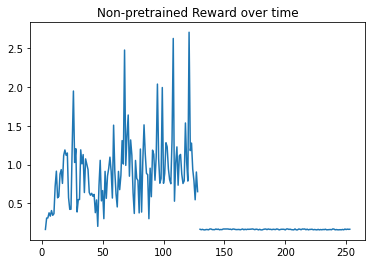

In [ ]:
run_reward_list = environment.episode_reward_list

plt.plot(list(range(len(run_reward_list))), run_reward_list)
plt.xlabel = "Episode"
plt.ylabel = "Reward"
plt.title("Non-pretrained Reward over time")
plt.show()